# Import libraries

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import math
import matplotlib.pyplot as plt
import torch

# What is PyTorch

## Warm-up: numpy

**Goal:** Let's start with a problem of fitting $y = sin(x)$ with a third order polynomial.

Being a third order polynomial means: $$y = ax^3 + bx^2 + cx + d$$


In [ ]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Visualize dataset
plt.plot(x, y)

### Model

#### Define functions

In [ ]:
def forward(x, a, b, c, d):
    """ y = ax^3 + bx^2 + cx + d
        y_pred = """
    # Begin code here

    # End code
    return y_pred

In [ ]:
def compute_loss(y, y_pred):
    """ MSE function
        loss = """
    # Begin code here

    # End code
    return loss

In [ ]:
def backward(x, y, y_pred):
    """ Compute gradients of a, b, c, d w.r.t loss
        grad_a =
        grad_b =
        grad_c =
        grad_d = """
    # Begin code here

    # End code
    return grad_a, grad_b, grad_c, grad_d

#### Train model

In [ ]:
# Initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 0.001

print([a, b, c, d])

In [ ]:
# Train through forward pass and backward pass
for epoch in range(1000):
    # Forward pass: Compute predicted y
    y_pred = forward(x, a, b, c, d)
    
    # Compute and print loss
    loss = compute_loss(y, y_pred)
    if epoch % 100 == 99:
        print(f'Epoch: {epoch}, loss: {loss}')

    # Backward pass: Compute gradients (a, b, c, d)
    grad_a, grad_b, grad_c, grad_d = backward(x, y, y_pred)

    # Update weights
    a = a - learning_rate * grad_a
    b = b - learning_rate * grad_b
    c = c - learning_rate * grad_c
    d = d - learning_rate * grad_d

print(f'Result: y = {a}x^3 + {b}x^2 + {c}x + {d}')

In [ ]:
# Visualize input and y_pred
y_pred = forward(x, a, b, c, d)
plt.plot(x, y_pred)

# PyTorch Tensors
the central data abstraction in PyTorch.

## Creating Tensors

There are many ways to create a Tensor:
- `torch.empty()`
- `torch.zeros()`
- `torch.ones()`
- `torch.rand()`
- `torch.tensor()`

In [ ]:
# Create a tensor
x = torch.empty(3, 4)  # <-- You can change to other functions to see how it works!

print(type(x))
print(x)
print(x.dtype)

A brief note about tensors and their number of dimensions, and terminology:
* You will sometimes see a 1-dimensional tensor called a *vector.*
* Likewise, a 2-dimensional tensor is often referred to as a *matrix.*
* Anything with more than two dimensions is generally just called a tensor.

In [ ]:
# tensor will copy a new content of given data
my_tensor = torch.tensor([[2, 10],
                          [20, 3]])

my_numpy = np.array([[2, 10],
                     [20, 3]])

my_tensor = torch.tensor(my_numpy)

## Data Types
`dtype` argument

In [ ]:
# Specify dtype argument at creation time
my_tensor = torch.ones((2, 3), dtype=torch.int32)
print(my_tensor)

In [ ]:
# Or convert exist tensor to another dtype
my_tensor = my_tensor.to(torch.bool)
print(my_tensor)

## Shapes

In [ ]:
# Get the shape of my_tensor
print(my_tensor)
print(my_tensor.shape)

We can create new tensor that has the same shape with exist ones by calling `torch.*_likes()` methods

In [ ]:
# Base tensor
my_tensor = torch.empty(3, 3, 3)
print('Base tensor:')
print(my_tensor)
print(my_tensor.shape)

empty_like_tensor = torch.empty_like(my_tensor)
print('\nEmpty tensor:')
print(empty_like_tensor)
print(empty_like_tensor.shape)

zeros_like_tensor = torch.zeros_like(my_tensor)
print('\nZeros tensor:')
print(zeros_like_tensor)
print(zeros_like_tensor.shape)

rand_like_tensor = torch.rand_like(my_tensor)
print('\nRand tensor:')
print(rand_like_tensor)
print(rand_like_tensor.shape)

## Math & Logic with PyTorch Tensors

### Basic arithmetic

Let's start with basic operation: **Tensor with Scalar**

In [ ]:
zeros = torch.zeros(3, 3)
ones = zeros + 1
twos = ones * 2

print('zeros:')
print(zeros)

print('\nones = zeros + 1:')
print(ones)

print('\ntwos = ones * 2')
print(twos)

As you can see above, arithmetic operations between tensors and scalars, such as addition, subtraction, multiplication, division, and exponentiation are **distributed over every element** of the tensor.

Because the output of such operation will also be a tensor, we can chain them together with the usual operator precedence rules:

In [ ]:
# Chain the operations
fours = ((ones * 2 + 3) ** 2 - 5) / 5
print(fours)

You'd intuitively expect the result of the similar operations between two tensors (**Tensor with Tensor**):

In [ ]:
threes = zeros + ones + twos
print('threes = zeros + ones + twos:')
print(threes)

dozens = threes * fours
print('\ndozens = threes * fours:')
print(dozens)

In general cases, binary operations should be performed on tensors with similar shape.

**Note: The following cell throws a run-time error. This is intentional.**


In [ ]:
tensor2_3 = torch.rand(2, 3)
tensor3_2 = torch.rand(3, 2)

print(tensor2_3 * tensor3_2)

#### In Brief: Tensor Broadcasting

The exception to the same-shapes rule is *tensor broadcasting*.

Let's see an example:

In [ ]:
tensor2_4 = torch.ones(2, 4)
tensor1_4 = torch.ones(1, 4)

print(tensor2_4)
print(tensor1_4)

print()

print('tensor2_4 + tensor1_4:')
print(tensor2_4 + tensor1_4)

The following examples honor the rules and allow broadcasting

In [ ]:
base_tensor =     torch.ones(3, 4, 5, 6)

# Compare from last to first

# Each dimension must be equal
a = base_tensor * torch.rand(3, 4, 5, 6)
print(a)

# or One of the dimensions must be of size 1
b = base_tensor * torch.rand(3, 1, 5, 6)
print(b)

# or The dimension does not exist in one of the tensors
c = base_tensor * torch.rand(   4, 5, 6)
print(c)

# or We can combine all the rules together
d = base_tensor * torch.rand(   4, 1, 6)
print(d)

The following examples are not broadcast-able, and **will throw run-time error. This is intentional.**

In [ ]:
base_tensor =     torch.ones(4, 3, 2)

# dimensions must match last-to-first
a = base_tensor * torch.rand(4, 3   )

b = base_tensor * torch.rand(   2, 3)

# Empty tensor
c = base_tensor * torch.rand(0)

### More Math with Tensors

#### Common Functions

In [ ]:
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(a.floor())
print(a.clamp(-0.5, 0.5))

#### Trigonometric functions and their inverses

In [ ]:
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])

sines = torch.sin(angles)
inverses = torch.asin(sines)
print('Sine and acrsine:')
print(angles)
print(sines)
print(inverses)

#### Bitwise operations

In [ ]:
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])

print('Bitwise XOR:')
print(torch.bitwise_xor(b, c))

#### Comparisions:

In [ ]:
d = torch.tensor([[1., 2.],
                  [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!

print(torch.eq(d, e))

#### Reductions

In [ ]:
print('Reduction ops:')

print(torch.max(d))
print(torch.max(d).item())

print(torch.mean(d))
print(torch.std(d))
print(d.prod())
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 3])))

#### Vector and linear algebra operations

In [ ]:
v1 = torch.tensor([1, 0, 0])
v2 = torch.tensor([0, 1, 0])
m1 = torch.rand(2, 2)
m2 = torch.tensor([[3.0, 0.0], [0.0, 3.0]])

print('Vector & Matrices')
print(torch.cross(v2, v1))
print(m1)
m3 = torch.matmul(m1, m2)
print(m3)
print(torch.svd(m3))

## Moving to GPU

We can check whether a GPU is available, with the `is_available()` method.

In [ ]:
if torch.cuda.is_available():
    print('máy gêm-ming')
    my_device = torch.device('cuda')
else:
    print('😏')
    my_device = torch.device('cpu')

In [ ]:
torch.cuda.device_count()

We can create tensors on specified hardware (CPU or GPU) by setting `device` argument by `my_device`

In [ ]:
my_tensor = torch.rand(2, 2, device=my_device)
print(my_tensor)

, Or move an existing tensor living on one device to another device with the `to()` method.

In [ ]:
tensor_cpu = torch.rand(2, 2)
tensor_gpu = tensor_cpu.to(my_device)

print(tensor_cpu)
print(tensor_gpu)

In [ ]:
import time

def manipulate(tensor_a, tensor_b, steps):
    t1 = time.time()

    for step in range(steps):
        tensor_a = (tensor_a * 10) / (tensor_a + tensor_b)

    t2 = time.time()

    print(f'Total time: {t2-t1}')
    # print(tensor_a)

We can easily see that performing ops on tensors on GPU is significantly faster than with tensors on CPU (*if u have gpu to see* 👈(ﾟヮﾟ👈))

In [ ]:
tensor_cpu = torch.ones(1000, 1000)
tensor_gpu = torch.ones(1000, 1000, device=my_device)

manipulate(tensor_cpu, tensor_cpu + 7, steps=2000)
manipulate(tensor_gpu, tensor_gpu + 7, steps=2000)

# PyTorch AutoGrad

### Simple Autograd

Create an input tensor and specify `requires_grad=True`. Setting this flag means that in every computation that follows, autograd will be accumulating the history of the computation in the output tensors of that computation.

In [4]:
a = torch.linspace(0., 2. * math.pi, steps=50, requires_grad=True)
print(a)

tensor([0.0000, 0.1282, 0.2565, 0.3847, 0.5129, 0.6411, 0.7694, 0.8976, 1.0258,
        1.1541, 1.2823, 1.4105, 1.5387, 1.6670, 1.7952, 1.9234, 2.0517, 2.1799,
        2.3081, 2.4363, 2.5646, 2.6928, 2.8210, 2.9493, 3.0775, 3.2057, 3.3339,
        3.4622, 3.5904, 3.7186, 3.8468, 3.9751, 4.1033, 4.2315, 4.3598, 4.4880,
        4.6162, 4.7444, 4.8727, 5.0009, 5.1291, 5.2574, 5.3856, 5.5138, 5.6420,
        5.7703, 5.8985, 6.0267, 6.1550, 6.2832], requires_grad=True)


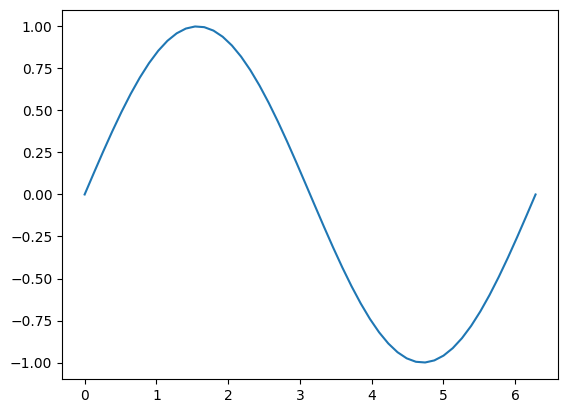

In [5]:
# Visualize inputs and ideal outputs
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

Let's see tensor `b`

In [6]:
print(b)

tensor([ 0.0000e+00,  1.2788e-01,  2.5365e-01,  3.7527e-01,  4.9072e-01,
         5.9811e-01,  6.9568e-01,  7.8183e-01,  8.5514e-01,  9.1441e-01,
         9.5867e-01,  9.8718e-01,  9.9949e-01,  9.9538e-01,  9.7493e-01,
         9.3847e-01,  8.8660e-01,  8.2017e-01,  7.4028e-01,  6.4823e-01,
         5.4553e-01,  4.3388e-01,  3.1511e-01,  1.9116e-01,  6.4070e-02,
        -6.4070e-02, -1.9116e-01, -3.1511e-01, -4.3388e-01, -5.4554e-01,
        -6.4823e-01, -7.4028e-01, -8.2017e-01, -8.8660e-01, -9.3847e-01,
        -9.7493e-01, -9.9538e-01, -9.9949e-01, -9.8718e-01, -9.5867e-01,
        -9.1441e-01, -8.5514e-01, -7.8183e-01, -6.9568e-01, -5.9811e-01,
        -4.9072e-01, -3.7527e-01, -2.5365e-01, -1.2788e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


The `grad_fn` let us know that `b` is calculated from a tensor by using `sin` function. When we execute the backpropagation step and compute gradients, we'll need to compute the derivative of `sin(x)` for all this tensor's inputs.

Let's perform some more computations:

In [7]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  2.5575e-01,  5.0731e-01,  7.5053e-01,  9.8144e-01,
         1.1962e+00,  1.3914e+00,  1.5637e+00,  1.7103e+00,  1.8288e+00,
         1.9173e+00,  1.9744e+00,  1.9990e+00,  1.9908e+00,  1.9499e+00,
         1.8769e+00,  1.7732e+00,  1.6403e+00,  1.4806e+00,  1.2965e+00,
         1.0911e+00,  8.6777e-01,  6.3022e-01,  3.8232e-01,  1.2814e-01,
        -1.2814e-01, -3.8232e-01, -6.3022e-01, -8.6777e-01, -1.0911e+00,
        -1.2965e+00, -1.4806e+00, -1.6403e+00, -1.7732e+00, -1.8769e+00,
        -1.9499e+00, -1.9908e+00, -1.9990e+00, -1.9744e+00, -1.9173e+00,
        -1.8288e+00, -1.7103e+00, -1.5637e+00, -1.3914e+00, -1.1962e+00,
        -9.8144e-01, -7.5053e-01, -5.0731e-01, -2.5575e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000,  1.2558,  1.5073,  1.7505,  1.9814,  2.1962,  2.3914,  2.5637,
         2.7103,  2.8288,  2.9173,  2.9744,  2.9990,  2.9908,  2.9499,  2.8769,
         2.7732,  2.6403,  2.4806,  2.2965,  2.0911,  1.8678,  1.6302,  1.3823

In [8]:
out = d.sum()
print(out)

tensor(50., grad_fn=<SumBackward0>)


Backward propagation is kicked off when we call `.backward()` on the output tensor. Autograd calculates and stores the gradients of each leaf node in the parameter's`.grad` attribute

In [9]:
out.backward()

tensor([ 2.0000,  1.9836,  1.9346,  1.8538,  1.7426,  1.6028,  1.4367,  1.2470,
         1.0368,  0.8096,  0.5691,  0.3192,  0.0641, -0.1920, -0.4450, -0.6907,
        -0.9251, -1.1442, -1.3446, -1.5229, -1.6762, -1.8019, -1.8981, -1.9631,
        -1.9959, -1.9959, -1.9631, -1.8981, -1.8019, -1.6762, -1.5229, -1.3446,
        -1.1442, -0.9251, -0.6907, -0.4450, -0.1920,  0.0641,  0.3192,  0.5691,
         0.8096,  1.0368,  1.2470,  1.4367,  1.6028,  1.7426,  1.8538,  1.9346,
         1.9836,  2.0000])


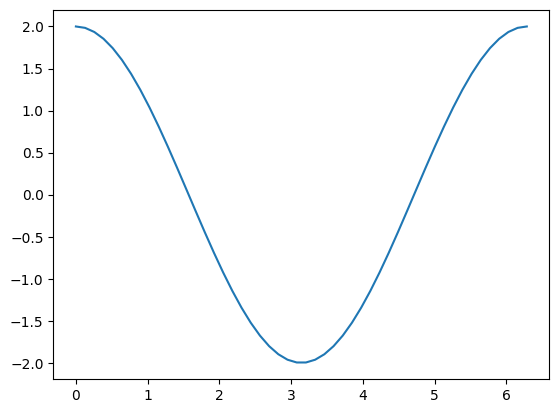

In [11]:
print(a.grad)

# We'll get 2*cos(a) graph
plt.plot(a.detach(), a.grad.detach())

In [12]:
print(c.grad)

None


C:\Users\Admin\SummerProject\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:485.)
  """Entry point for launching an IPython kernel.


### Practice

Rebuild the warm-up model with autograd

#### Practice here

In [225]:
# Initialize weights
# Remember they are leaf node
a = torch.randn(1)
b = torch.randn(1)
c = torch.randn(1)
d = torch.randn(1)

learning_rate = 0.001

print(a, b, c, d)

tensor([0.9589]) tensor([-1.0821]) tensor([-1.5838]) tensor([1.2364])


In [ ]:
# Train through forward pass and backward pass
for epoch in range(1000):
    # Forward pass: Compute predicted y
    y_pred =

    # Compute and print loss
    loss =
    if epoch % 100 == 99:
        print(f'Epoch: {epoch}, loss: {loss}')

    # Backward pass: Compute gradients (a, b, c, d) through `loss.backward()`
    loss.backward()
    #
    a = a - learning_rate *
    b = b - learning_rate *
    c = c - learning_rate *
    d = d - learning_rate *

print(f'Result: y = {a}x^3 + {b}x^2 + {c}x +{d}')

In [ ]:
# Visualize inputs and y_pred
y_pred = forward(x, a, b, c, d)
plt.plot(x, y_pred)

#### Modelize :>

In [200]:
import torchvision.transforms as transforms

# Transform tensor [x] into [[x^3, x^2, x, 1]]
class CustomTransform(object):
    def __call__(self, x):
        return torch.stack([x**3, x**2, x, torch.ones_like(x)], dim=1)

transform = transforms.Compose([
    CustomTransform()
])

In [201]:
class MyModel(torch.nn.Module):

    def __init__(self):
        super(MyModel, self).__init__()
        self.linear = torch.nn.Linear(4, 1, device=my_device)

    def forward(self, x):
        x = self.linear(x)
        # x = torch.squeeze(x)
        return x

# Re-initialize inputs and ideal outputs
x = torch.linspace(-math.pi, math.pi, 2000, device=my_device)
y = torch.sin(x)

In [202]:
# Transform tensor x
x = transform(x)
print(x)

tensor([[-31.0063,   9.8696,  -3.1416,   1.0000],
        [-30.9133,   9.8499,  -3.1384,   1.0000],
        [-30.8205,   9.8301,  -3.1353,   1.0000],
        ...,
        [ 30.8205,   9.8301,   3.1353,   1.0000],
        [ 30.9133,   9.8499,   3.1384,   1.0000],
        [ 31.0063,   9.8696,   3.1416,   1.0000]], device='cuda:0')


In [220]:
# Configure hyperparameters
num_epoch = 1000
learning_rate = 1e-6

In [221]:
# Define model
model = MyModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss(reduction='sum')

In [222]:
print(model.linear.weight)
print(model.linear.weight.grad)

Parameter containing:
tensor([[-0.0620, -0.2946,  0.3748, -0.4154]], device='cuda:0',
       requires_grad=True)
None


In [206]:
def train_model(num_epoch=1000, learning_rate=1e-6):
    for epoch in range(num_epoch):
        y_pred = model(x)

        optimizer.zero_grad()
        loss = criterion(y, y_pred)
        loss.backward()

        if epoch % 100 == 99:
            print(f"Epoch: {epoch + 1}, loss: {loss}")
            # print(f'Weights: {model.linear.weight.detach()}')

        # Update parameters
        optimizer.step()

In [207]:
train_model()

Epoch: 100, loss: 540.0482177734375
Epoch: 200, loss: 341.9776306152344
Epoch: 300, loss: 219.87098693847656
Epoch: 400, loss: 143.65480041503906
Epoch: 500, loss: 95.56803894042969
Epoch: 600, loss: 64.95048522949219
Epoch: 700, loss: 45.30693054199219
Epoch: 800, loss: 32.62525939941406
Epoch: 900, loss: 24.396575927734375
Epoch: 1000, loss: 19.035438537597656


In [209]:
# Visualize inputs and predicted outputs
y_pred = model(x)
y_pred = y_pred.cpu().data.numpy()
x = x.cpu().data.numpy()
plt.plot(x[:, 3], y)

TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

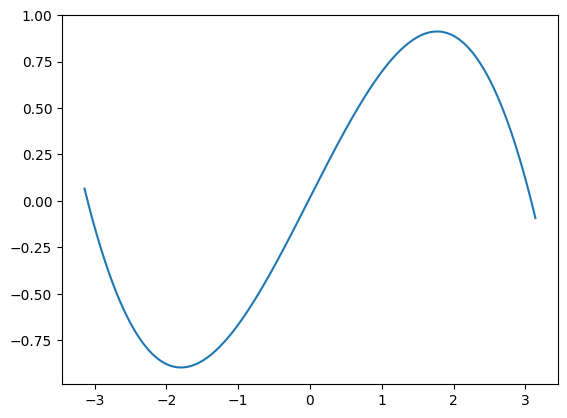

In [211]:
plt.plot(x[:, 2], y_pred)